In [1]:
import API
from API import *
import warnings
warnings.filterwarnings('ignore')
import importlib

In [2]:
#importlib.reload(API)

# Exercice 1

### Question 2

In [3]:
DTC = DecisionTreeClassifier(max_depth=5)
GNB = GaussianNB()
KNC = KNeighborsClassifier(n_neighbors=1)

classifieurs = [DTC, GNB, KNC]

### Question 3

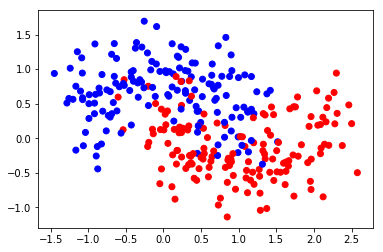

In [4]:
# génère des données synthétiques, deux classes sous formes de croissants de lunes
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=11)
plt.scatter(Y[:,0],Y[:,1],c=c,cmap=plt.cm.bwr)

### Question 4

In [5]:
plis = API.generer_plis(300,5)

### Question 5

In [6]:
# Calul du score de cross validation
scores = API.calcul_score(classifieurs, plis, Y, c, names = ["DTC","GNB","KNC"])
print(scores)

        DTC       GNB       KNC
1  0.883333  0.833333  0.883333
2  0.866667  0.800000  0.816667
3  0.833333  0.833333  0.883333
4  0.850000  0.850000  0.800000
5  0.866667  0.850000  0.866667


### Question 6

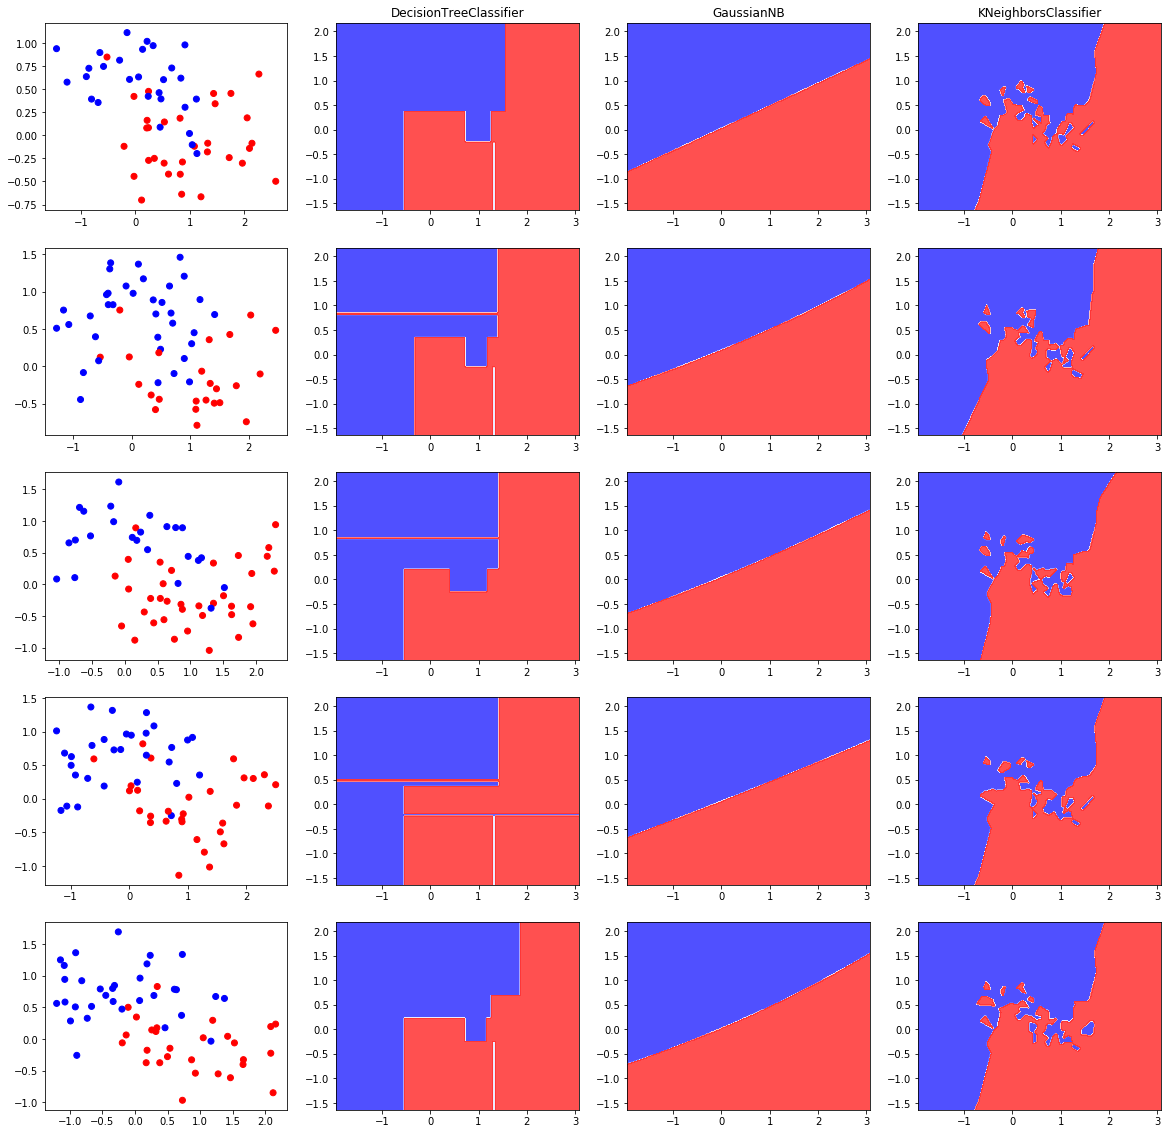

In [7]:
API.afficher_crossval(classifieurs, Y, c, plis)

### Question 7

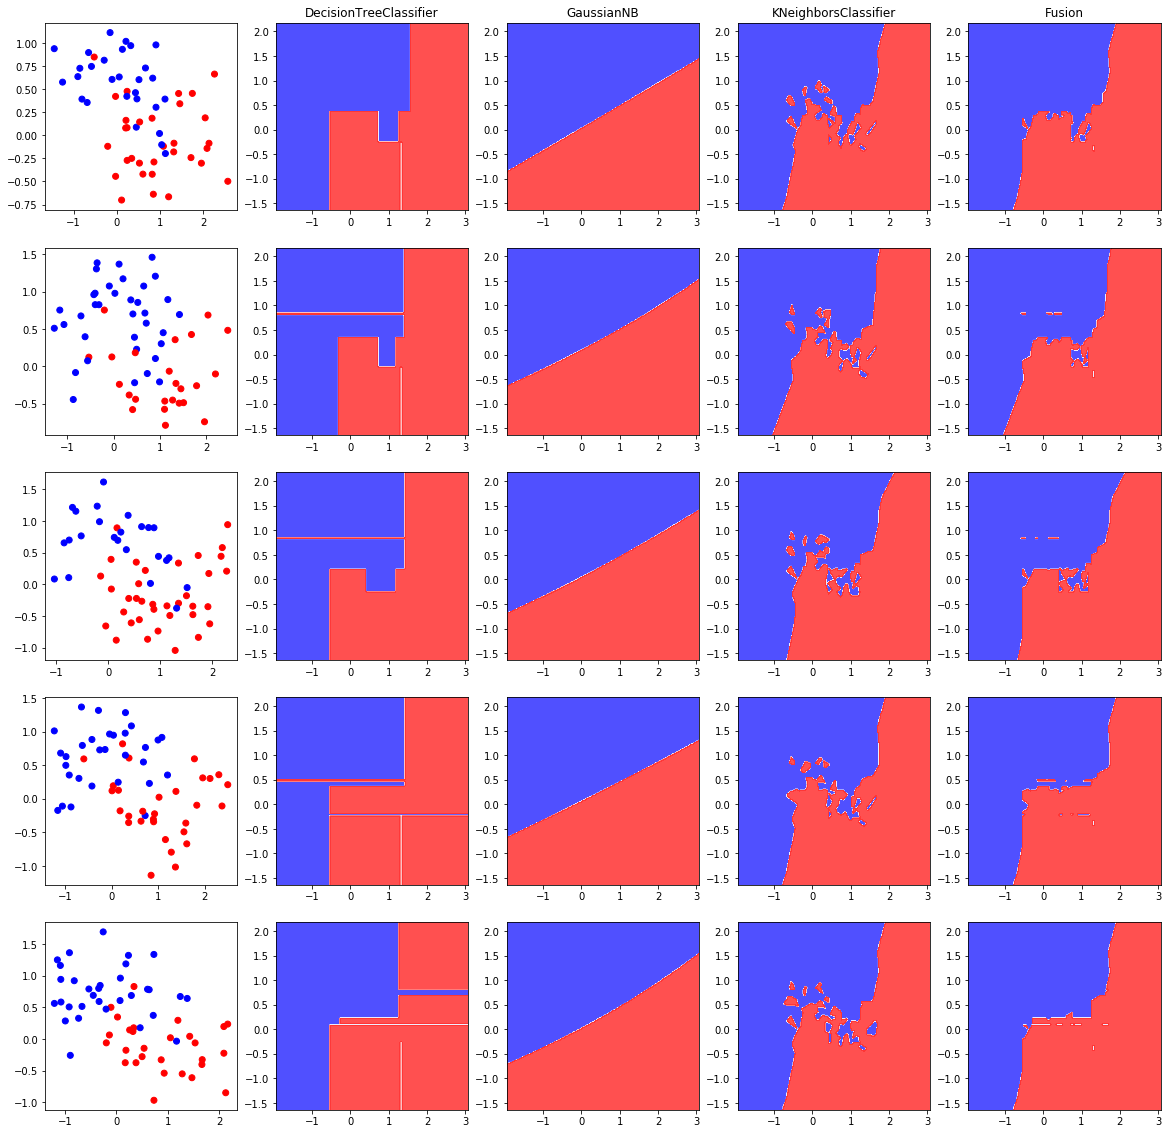

In [8]:
afficher_crossval(classifieurs, Y, c, plis, with_fusion=True, fusion_class = fusion_vote_maj_binary)

### Question 8

In [9]:
# Calul du score de cross validation
scores = API.calcul_score(classifieurs, plis, Y, c, names=["DTC","GNB","KNC","FVM"],with_fusion=True,fusion_class=fusion_vote_maj_binary)
print(scores)

        DTC       GNB       KNC       FVM
1  0.883333  0.833333  0.883333  0.883333
2  0.866667  0.800000  0.816667  0.866667
3  0.833333  0.833333  0.883333  0.900000
4  0.850000  0.850000  0.800000  0.866667
5  0.883333  0.850000  0.866667  0.900000


En terme de score, la fusion par vote majoritaire est ici presque toujours plus performante. On le voit bien dans les frontières de décision, que la fusion montre une frontière qui serait plus proche de ce qu'un humain dessinerait naturellement. Elle fonctionne bien ici car chacun des classifieur simple capte des caractéristiques du dataset que les autres ne voient pas, et ils ont ainsi tous un avis complémentaire.

### Question 9

In [15]:
classifieurs = [DTC, GNB, KNC]
n = 100
(Y,c) = make_moons(n_samples=300,noise=0.3, random_state=1)
scores = calcul_score(classifieurs, plis, Y, c, names = ["DTC","GNB","KNC","FVM"], with_fusion=True, fusion_class=fusion_vote_maj_binary)
for i in range(2,n):
    print(f"avancée {i/n*100:.2f}%", flush=True, end='\r')
    (Y,c) = make_moons(n_samples=300,noise=0.3, random_state=i)
    scores = np.vstack((scores,calcul_score(classifieurs, plis, Y, c,names = ["DTC","GNB","KNC","FVM"], with_fusion=True, fusion_class=fusion_vote_maj_binary)))

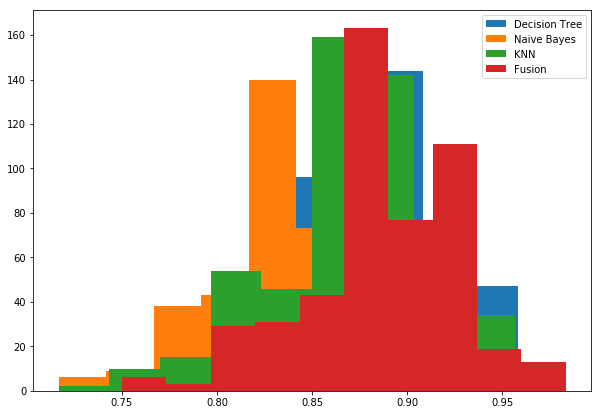

In [16]:
plt.figure(figsize=(10,7))
plt.hist(scores[:,0], label="Decision Tree" );
plt.hist(scores[:,1], label="Naive Bayes" );
plt.hist(scores[:,2], label="KNN" );
plt.hist(scores[:,3], label= "Fusion");
plt.legend();

In [17]:
print(f"écart type de Decision Tree = {scores[:,0].std()}")
print(f"écart type de Naive Bayes = {scores[:,1].std()}")
print(f"écart type de KNN = {scores[:,2].std()}")
print(f"écart type de Fusion = {scores[:,3].std()}")

écart type de Decision Tree = 0.04284101307955226
écart type de Naive Bayes = 0.04461623771733498
écart type de KNN = 0.04177410560723775
écart type de Fusion = 0.040803580109846166


En changeant la seed, on change le dataset donc il est normal que la performance de la fusion ne soit pas la même.<br>
On voit quand même que la variance du score de la fusion est plus faible que celui des autres classifieurs. Fusionner plus classifieurs permet d'augmenter la robustesse en plus de la précision.

### Question 10

In [21]:
from sklearn.neural_network import MLPClassifier
best_clf = MLPClassifier(hidden_layer_sizes=(100,35),activation='relu',alpha=1e-8,max_iter=1000)
scores = calcul_score([best_clf], plis, Y, c, names = ["MLP"])
scores

,MLP
1,0.933333
2,0.866667
3,0.866667
4,0.916667
5,0.933333


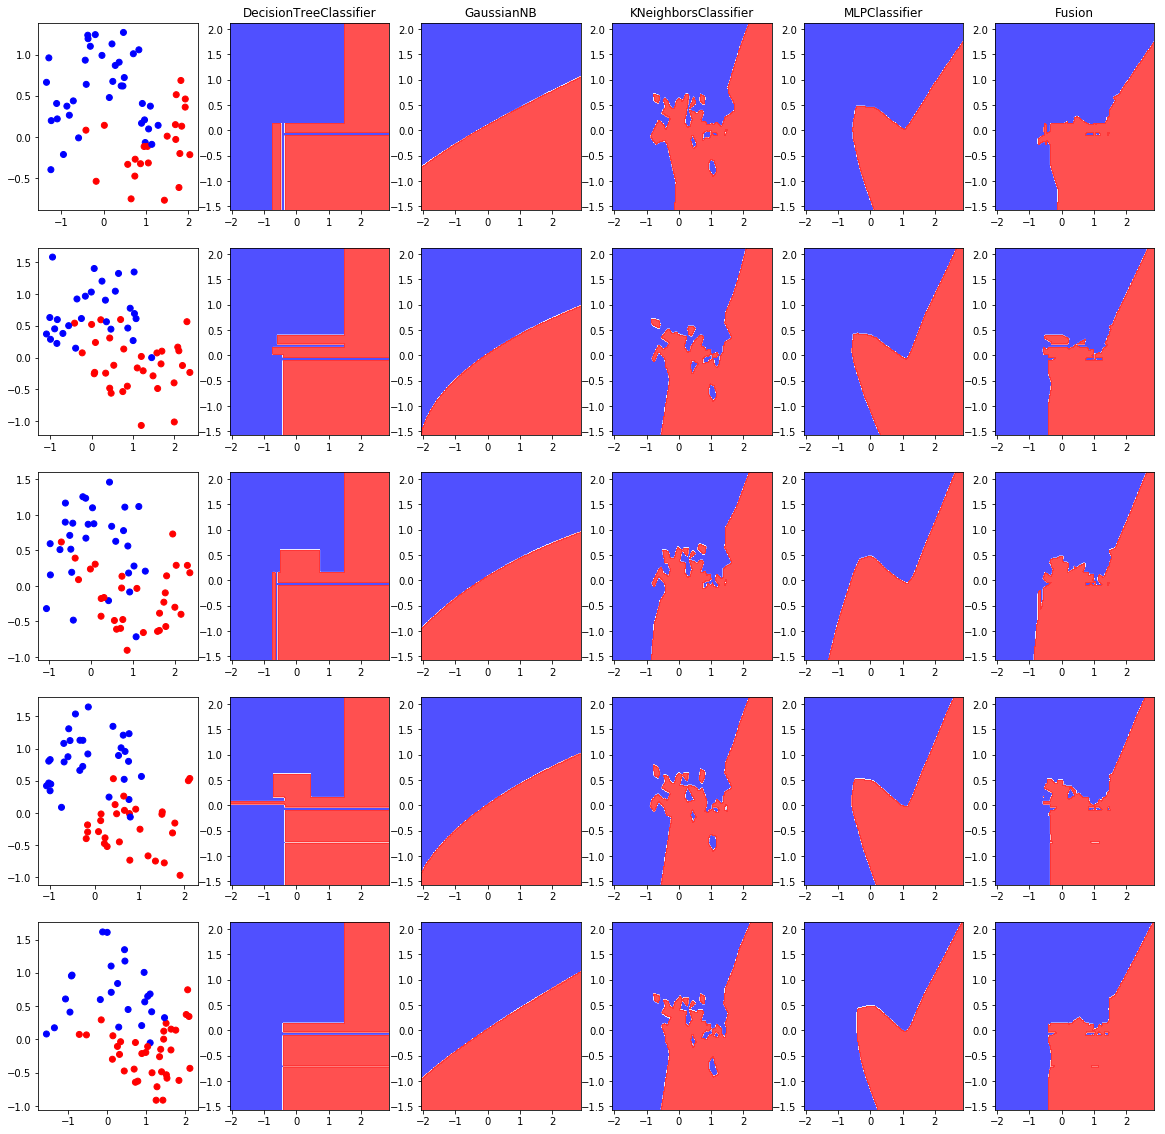

In [19]:
# Calul du score de cross validation
classifieurs = np.array([DTC, GNB, KNC,best_clf])
afficher_crossval(classifieurs, Y, c, plis, with_fusion=True, fusion_class = fusion_vote_maj_binary)

In [22]:
scores = calcul_score(classifieurs, plis, Y, c, names = ["DTC","GNB","KNC","MLP","FVM"],with_fusion=True, fusion_class=fusion_vote_maj_binary)
print(scores)

        DTC       GNB       KNC       MLP       FVM
1  0.950000  0.816667  0.866667  0.933333  0.950000
2  0.883333  0.850000  0.850000  0.850000  0.883333
3  0.900000  0.783333  0.866667  0.850000  0.900000
4  0.950000  0.950000  0.883333  0.916667  0.933333
5  0.933333  0.883333  0.933333  0.916667  0.933333


Lorsqu'on a un classifieur qui est déjà bon tout seul, il y a peu de chance qu'on améliore sa performance en l'incluant dans un ensemble de classifieurs moins bons avec une méthode par vote majoritaire. En effet, si les classifieurs moins bons ne captent pas des caractéristiques du dataset qui seraient complémentaire aux caractéristiques trouvées par le réseau de neurones (ce qui est le cas ici), leur donner des voix de votes ne va faire que baisser le score.

# Exercice 2

### Question 1

In [23]:
DTC = DecisionTreeClassifier(max_depth=5)
GNB = GaussianNB()
KNC = KNeighborsClassifier(n_neighbors=1)
DTC_faible = DecisionTreeClassifier(max_depth=1)


classifieurs = [DTC, GNB, KNC, DTC_faible]

In [24]:
scores = API.calcul_score(classifieurs, plis, Y, c, names = ["DTC","GNB","KNC","DTC_faible","FVM"],with_fusion=True, fusion_class=API.fusion_vote_maj_binary)
print(scores)

        DTC       GNB       KNC  DTC_faible       FVM
1  0.933333  0.816667  0.866667    0.800000  0.916667
2  0.883333  0.850000  0.850000    0.833333  0.866667
3  0.900000  0.783333  0.866667    0.766667  0.850000
4  0.950000  0.950000  0.883333    0.900000  0.950000
5  0.933333  0.883333  0.933333    0.866667  0.933333


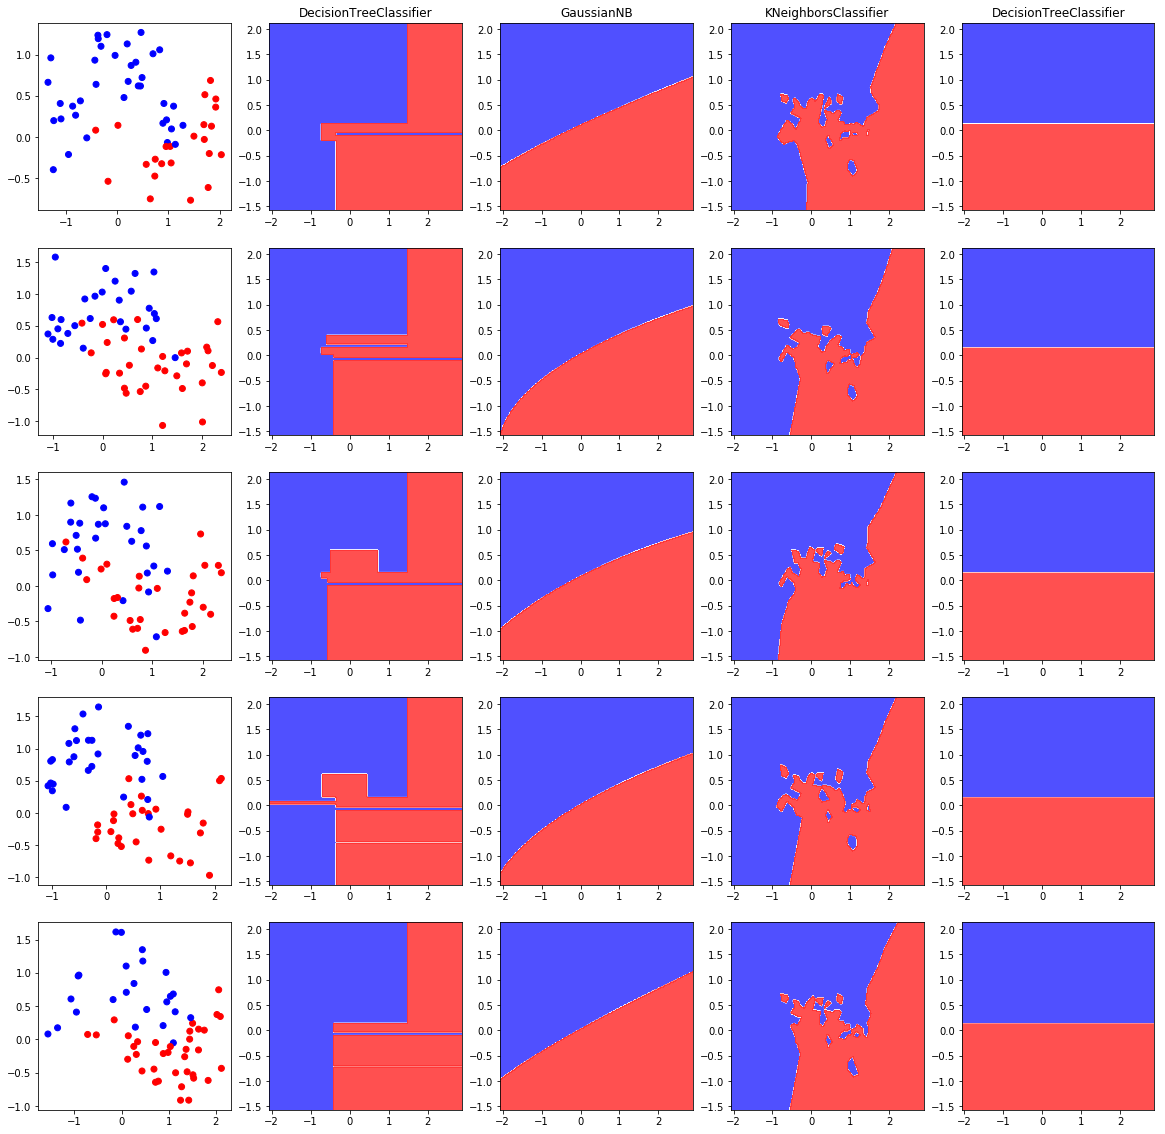

In [25]:
API.afficher_crossval(classifieurs, Y, c, plis)

### Question 2

#### Vote majoritaire

In [36]:
classifieurs = [DTC, GNB, KNC, DTC_faible]
n_plis = 5
names = ["DTC", "GNB", "KNC", "DTC_faible","FVP"]
API.score_deux_etages(classifieurs, Y, c, n_plis, names, is_pondere=False)

,DTC,GNB,KNC,DTC_faible,FVP
1,0.950000,0.816667,0.866667,0.800000,0.916667
2,0.883333,0.850000,0.850000,0.833333,0.866667
3,0.900000,0.783333,0.866667,0.766667,0.850000
4,0.950000,0.950000,0.883333,0.900000,0.950000
5,0.933333,0.883333,0.933333,0.866667,0.933333


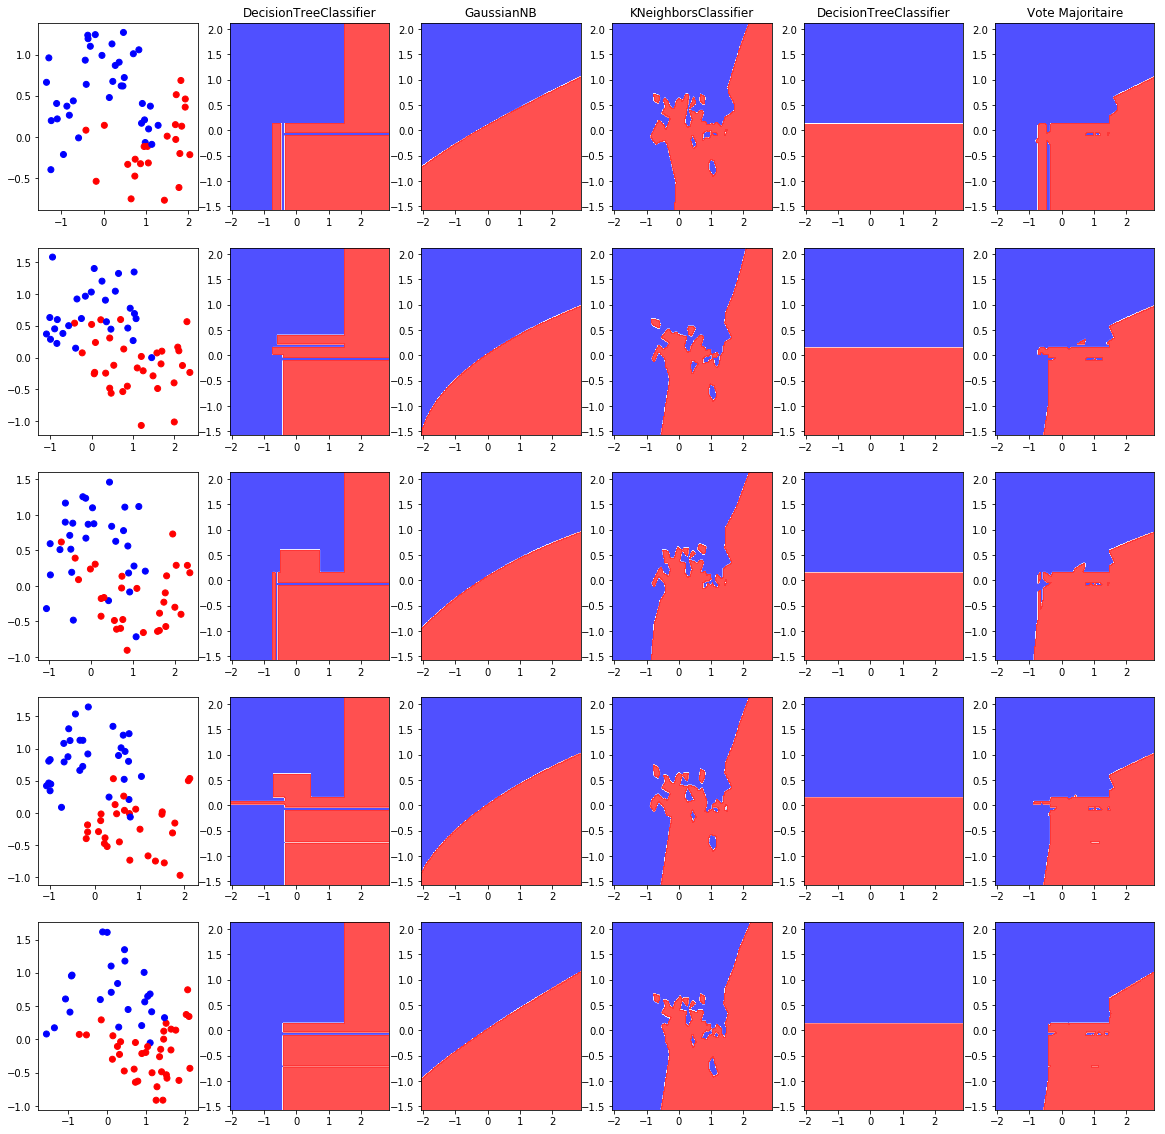

In [37]:
API.affichage_deux_etages(classifieurs, Y, c, n_plis, "Vote Majoritaire", is_pondere=False)

### Vote pondéré

In [38]:
scores = API.score_deux_etages(classifieurs, Y, c, n_plis, names)
scores

,DTC,GNB,KNC,DTC_faible,FVP
1,0.933333,0.816667,0.866667,0.800000,0.933333
2,0.883333,0.850000,0.850000,0.833333,0.866667
3,0.900000,0.783333,0.866667,0.766667,0.900000
4,0.950000,0.950000,0.883333,0.900000,0.950000
5,0.933333,0.883333,0.933333,0.866667,0.933333


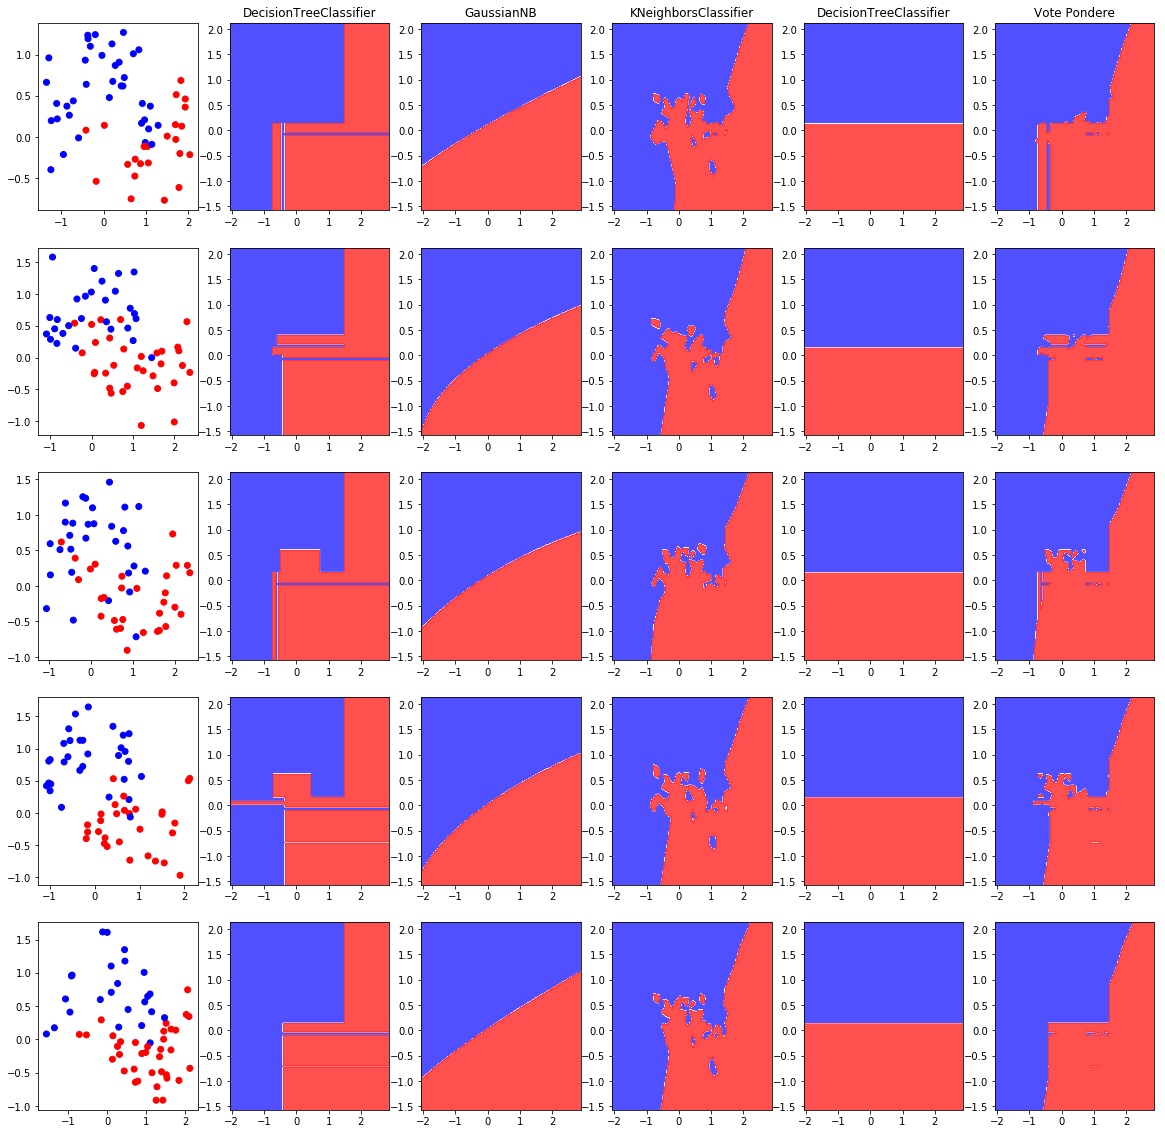

In [39]:
API.affichage_deux_etages(classifieurs, Y, c, n_plis, "Vote Pondere")

### Question 4

In [40]:
def softmax(wi,r):
    expwi = np.exp(r*wi)
    return expwi/expwi.sum()

In [42]:
scores = API.score_deux_etages(classifieurs, Y, c, n_plis, names, weight_function=lambda x : softmax(x,r=15))
scores

,DTC,GNB,KNC,DTC_faible,FVP
1,0.950000,0.816667,0.866667,0.800000,0.933333
2,0.883333,0.850000,0.850000,0.833333,0.883333
3,0.900000,0.783333,0.866667,0.766667,0.900000
4,0.950000,0.950000,0.883333,0.900000,0.950000
5,0.933333,0.883333,0.933333,0.866667,0.933333


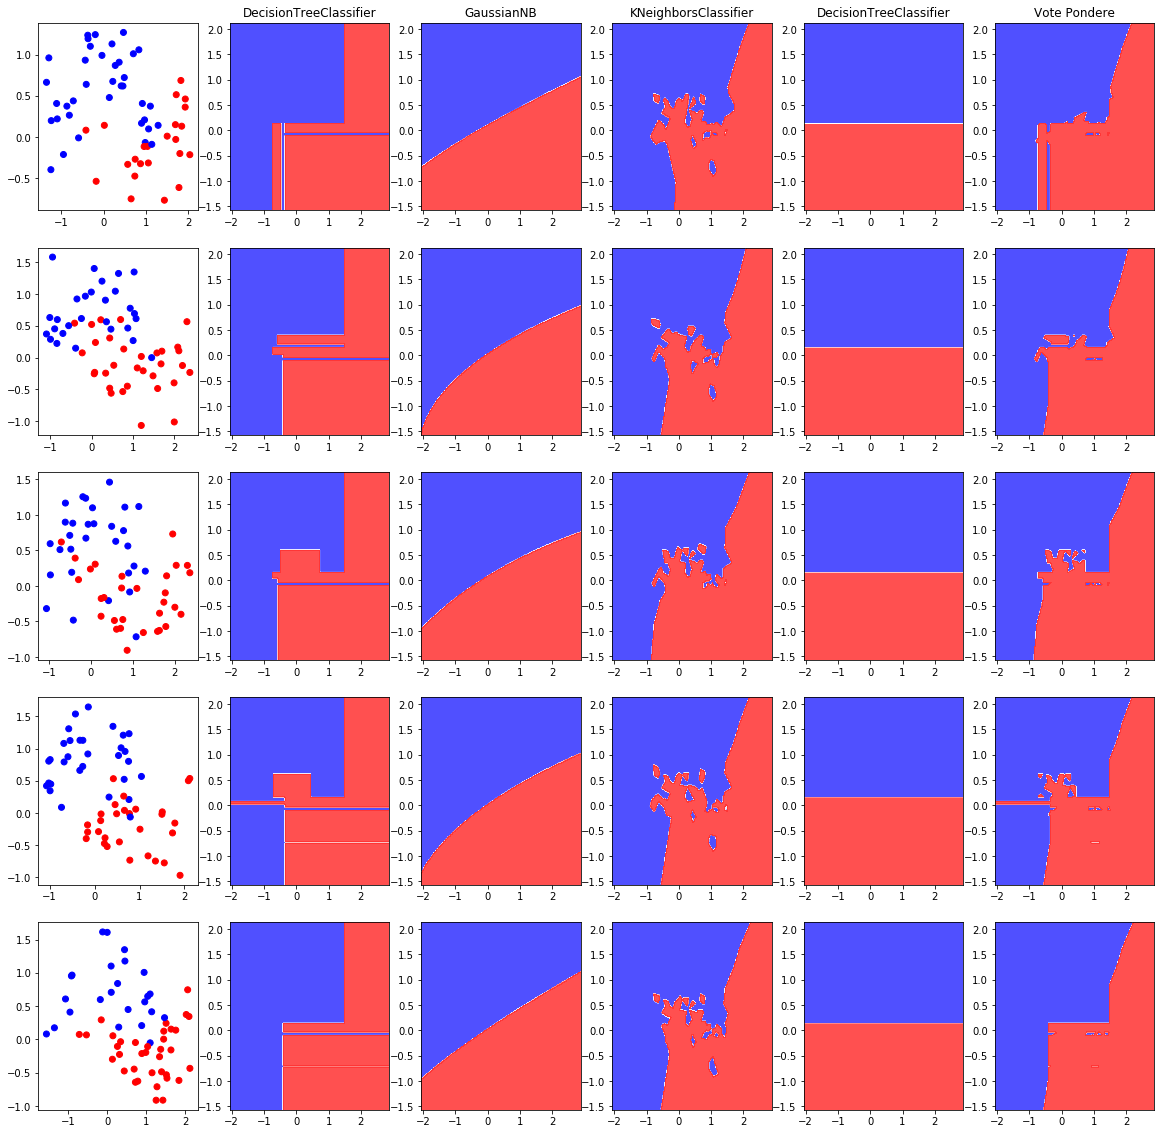

In [43]:
API.affichage_deux_etages(classifieurs, Y, c, n_plis,"Vote Pondere", weight_function=lambda x : softmax(x,r=15))

### Question 5

In [33]:
API.score_deux_etages(classifieurs, Y, c, n_plis, names, weight_function=lambda x : softmax(x,r=100))

,DTC,GNB,KNC,DTC_faible,FVP
1,0.933333,0.816667,0.866667,0.800000,0.866667
2,0.883333,0.850000,0.850000,0.833333,0.850000
3,0.900000,0.783333,0.866667,0.766667,0.900000
4,0.950000,0.950000,0.883333,0.900000,0.950000
5,0.933333,0.883333,0.933333,0.866667,0.933333


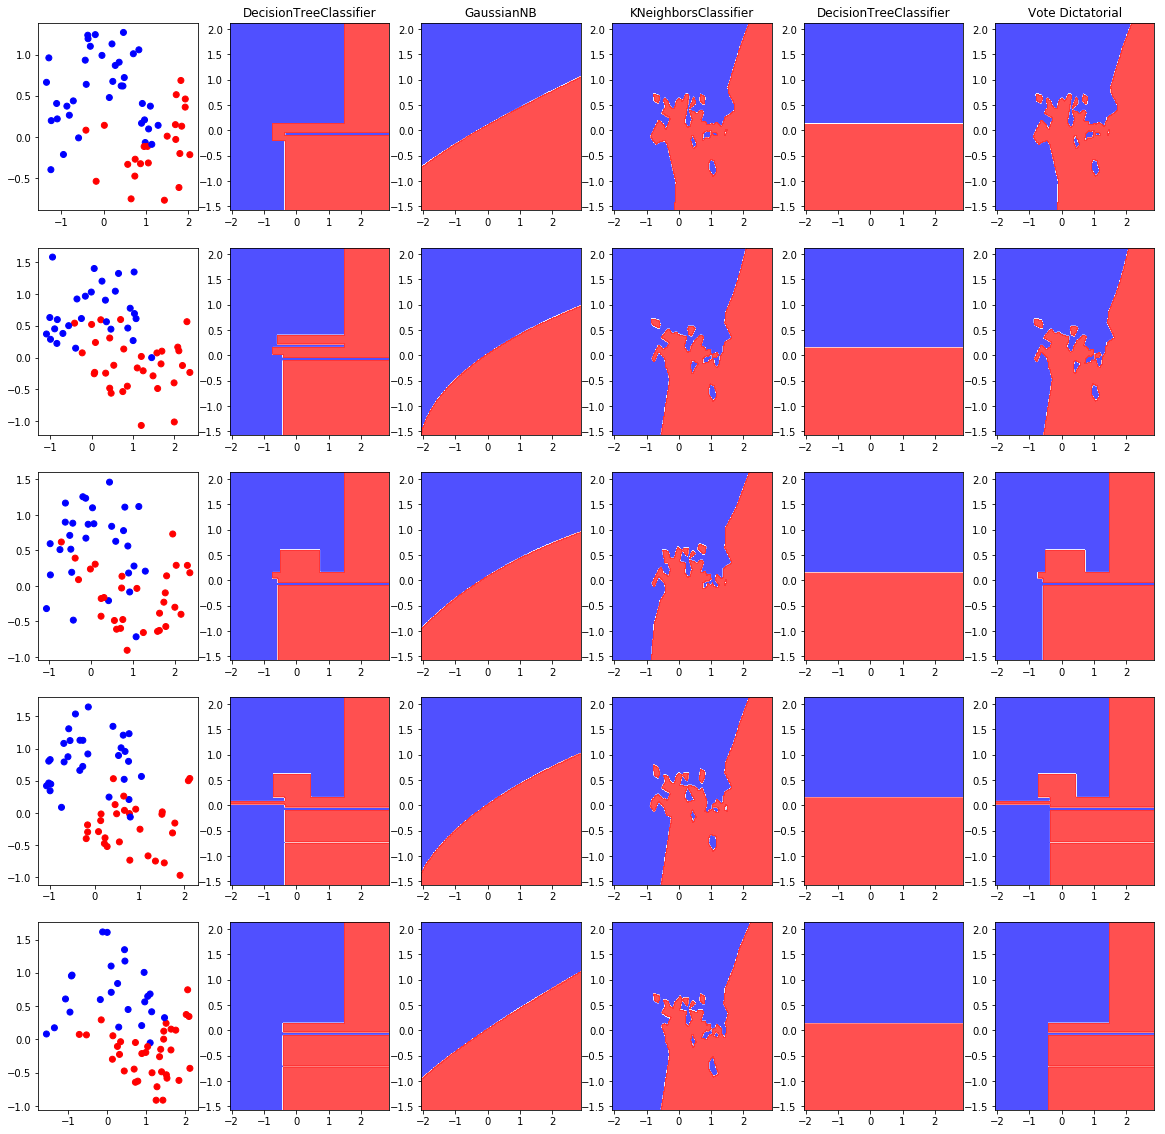

In [35]:
API.affichage_deux_etages(classifieurs, Y, c, n_plis, "Vote Dictatorial", weight_function=lambda x : softmax(x,r=100))

On remarque que pou $r=100$, le vote pondéré donne le même résultat que le meilleur classifieur, ceci est normal car comme $\exp(w_ir)$ augmente exponentiellement avec $r$ est que la somme des poids fait $1$, on a quasiment $p_i=0$ pour les classieurs sauf pour le meillieur, où l'on a $p_i=1$.